In [1]:
from os.path import join as pjoin
import os
import numpy as np
import seaborn as sns
import scipy
import glob
from scipy.signal import periodogram
import matplotlib.pyplot as plt

In [2]:
# load example time series
melodic_outdir_s1 = '/home/homeGlobal/oli/somato/scratch/ica/MELODIC/melodic_wf_workdir/subject_lvl/somato_melodic_wf/melodic/mapflow/_melodic0/'
comp1_tsfile = pjoin(melodic_outdir_s1, 'report/t1.txt')
ts_arr = np.loadtxt(comp1_tsfile)

# Find components whose max frequency is exactly our stimulation cycle

In [3]:
ncomps = []
for ind in range(2):
    melodic_outdir = '/home/homeGlobal/oli/somato/scratch/ica/MELODIC/melodic_wf_workdir/subject_lvl/somato_melodic_wf/melodic/mapflow/_melodic%i/' % ind
    zstat_files = glob.glob(pjoin(melodic_outdir, 'stats', 'thresh_*'))
    ncomps.append(len(zstat_files))
    
print(ncomps)

[60, 74]


In [4]:
ncomps_sub1=ncomps[0]
melodic_outdir_s1 = '/home/homeGlobal/oli/somato/scratch/ica/MELODIC/melodic_wf_workdir/subject_lvl/somato_melodic_wf/melodic/mapflow/_melodic0/'


In [5]:
factors_comps = []
multiples_comps = []
exact_comps = []

for idx, comp_id in enumerate(range(1,ncomps_sub1+1)):
    tsfile = pjoin(melodic_outdir_s1, 'report/t%i.txt' % comp_id)
    ts_arr = np.loadtxt(tsfile)
    
    frequencies, powerdensities = periodogram(ts_arr, fs=.5)
    maxid = np.argmax(powerdensities)
    maxfreq, maxpower = frequencies[maxid], powerdensities[maxid]
    
    if np.isclose(maxfreq, .0390625):
        exact_comps.append(idx)
    if maxfreq % .0390625 == 0:
        multiples_comps.append(idx)
    if .0390625 % maxfreq == 0:
        factors_comps.append(idx)


print("""
of the %i independent components in this functional run
%i match the stimulus frequency perfectly
%i are multiples of the stimulus frequency
%i are factors of the stimulus frequency
""" % (ncomps_sub1, len(multiples_comps), len(factors_comps), len(exact_comps)))


of the 60 independent components in this functional run
1 match the stimulus frequency perfectly
5 are multiples of the stimulus frequency
1 are factors of the stimulus frequency



## Plot time series & power spectrum of ICs

Plot all independent components and highlight the matched ones with bold row titles.

- **red**: exact matche with stimulus frequency
- **green**: max frequency is divisible by stimulus frequency
- **blue**: max frequency is multiple of stimulus frequency

In [6]:
sns.set_style('white')
sns.set_context('notebook')

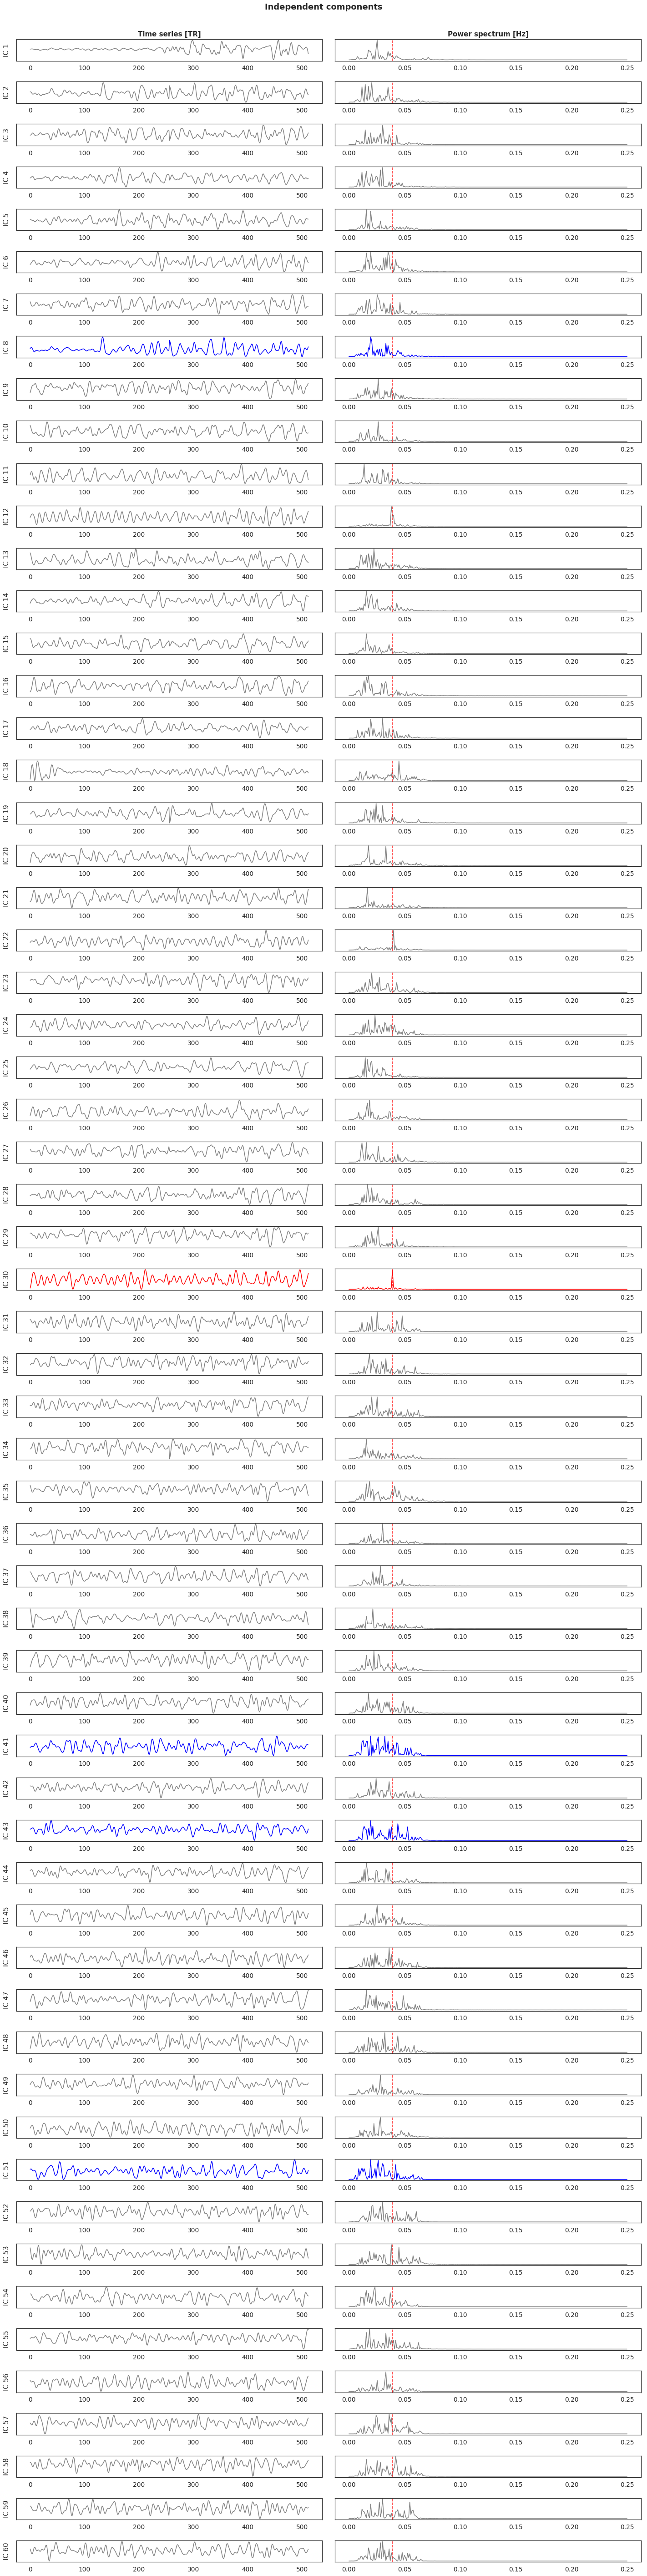

In [9]:
# set up figure
rowheight=1.3
sns.set(font_scale=1.25, style='white', context='notebook')
fig, axs = plt.subplots(ncols=2, nrows=ncomps_sub1, figsize=(20, ncomps_sub1*rowheight))

# iterate through all components
for comp_id, axis in zip(range(ncomps_sub1), axs):
    # load time series file output from melodic
    tsfile = pjoin(melodic_outdir_s1, 'report/t%i.txt' % (comp_id+1))
    ts_arr = np.loadtxt(tsfile)
    # calculate powerspectrum
    frequencies, powerdensities = periodogram(ts_arr, fs=.5)

    # set color depending on whether maxfrequency is 
    # multiple of or divisible by target frequency    
    if comp_id in exact_comps:
        lineplot_kws = {'color': 'red'}
    elif comp_id in multiples_comps:
        lineplot_kws = {'color': 'green'}
    elif comp_id in factors_comps:
        lineplot_kws = {'color': 'blue'}
    else:
        lineplot_kws = {'color': 'grey'}
    
    # plot ts and powerspectrum 
    sns.lineplot(y=ts_arr, x=range(len(ts_arr)), ax=axis[0], **lineplot_kws)
    sns.lineplot(y=powerdensities, x=frequencies, ax=axis[1], **lineplot_kws)
    
    # set row title
    axis[0].set_ylabel('IC %i' % (comp_id+1), rotation=90)
    # remove y ticks for less clutter
    axis[0].set_yticklabels([])
    axis[1].set_yticklabels([])
    
    # draw line for stimulation cycle frequency
    axis[1].axvline(0.0390625, color='red', linestyle='--')
    
# set titles for the two rows
axs[0][0].set_title('Time series [TR]', fontweight='bold')
axs[0][1].set_title('Power spectrum [Hz]', fontweight='bold')
fig.suptitle('Independent components', fontweight='bold', y=1.008)
fig.tight_layout()